## Desanonimización de transacciones en TCash y Ethereum

### Primero, un poco de contexto: 

#### Blockchain?

#### Ethereum? 

#### Privacidad?

#### Tornado Cash?

### Blockchain 

En pocas palabras, una Blockchain es una **base de datos inmutable** y **descentralizada** 

- Cada nuevo registro queda encadenado a los anteriores, por lo que el orden tampoco puede ser alterado. 

- La descentralización y consisntencia se logra introduciendo incentivos económicos.

- Por ejemplo, tomando el caso de **Bitcoin**:
    - Podemos pensarlo como un cuaderno de contabilidad, donde se van anotando las transacciones entre usuarios.
    - Cada nueva transacción queda anotada en la blockchain, llevandola a un nuevo estado.
    - Si quisiéramos recontruir el balance de una cuenta (cuanto dinero tiene), simplemente hay que recorrer todas las transacciones que involucren esa cuenta.

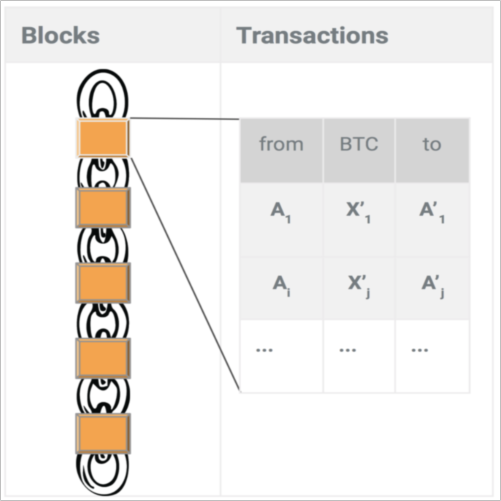

In [11]:
using Images, FileIO

imresize(load("../images/bitcoin_ledger.png"), 2000, 2000)

### Ethereum

Ethereum, por otro lado, es una blockchain que permite correr código (smart contracts)

En Ethereum las transacciones funcionan como *inputs* de la Ethereum Virtual Machine. Estos inputs ahora cambian el estado de la máquina virtual y, al interactuar con algun smart contract, pueden disparar otras ejecuciones.

Es por esto que en Ethereum tendremos un conjunto de ejecuciones llamadas traces. Estas son el conjunto de ejecuciones disparadas por las transacciones.

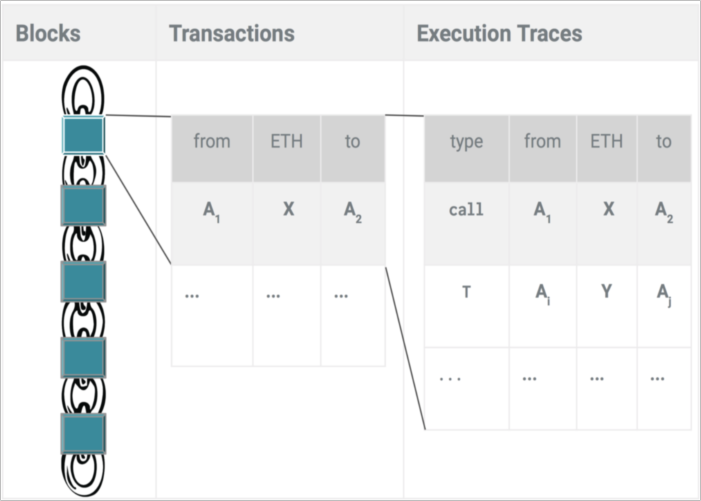

In [14]:
imresize(load("../images/ethereum_tx.png"), 2000, 2800) # https://medium.com/@theimperialduke/ethereum-traces-not-transactions-3f0533d26aa

 ### Privacidad 
 
 #### Privacidad en blockchain vs privacidad en el sistema financiero tradicional
 
En el sistema financiero tradicional, las cuentas bancarias están vinculadas públicamente a una persona física. Esto significa que, dada una cuenta bancaria, se puede llegar directamente a su propietario. Sin embargo, los bancos mantienen en privado todas las transacciones de esa cuenta.

En la mayoría de las blockchain el historial de transacciones es **completamente público**. Esto significa que dada la dirección de una cuenta, se pueden rastrear todas las transacciones que haya realizado.

Por ejemplo, veamos todo el historial de la cuenta [0x53c5dfab1450924c4f6592eb9b0b593e33950e9c](https://etherscan.io/address/0x53c5dfab1450924c4f6592eb9b0b593e33950e9c)

Un error común entre los usuarios de blockchain es pensar que por el hecho de usar pseudónimos (la cuenta no está linkeada a priori a una persona) la privacidad está garantizada. 

Pero es casi todo lo contrario. Al ser el historial de transacciones completamente público, cada transacción que una cuenta hace va revelando más información sobre el usuario. Una vez realizado el link, todo el historial financiero se ve comprometido.


### Tornado Cash

Es un smart contract que busca resolver este problema. En palabras de tornado: 

"Tornado Cash improves transaction privacy by breaking the on-chain link between source and destination addresses. It uses a smart contract that accepts ETH & other tokens deposits from one address and enables their withdrawal from a different address."

En pocas palabras, tornado cash permite hacer depósitos de montos definidos a distintos pools, por ejemplo de 1 ETH. 

Veamos la [app](https://tornadocash.eth.link/)

Luego de hacer el depósito, tornado permite retirar el dinero depositado con otra cuenta. La idea es que, al haber muchas cuentas depositantes, un determinado retiro podría venir de cualquiera de los depósitos. De ea forma se rompe el link.

La suma de todos los posibles depósitos de los que *podría* venir el retiro se define como **anonymity set**

Sin embargo, los usuarios pueden no ser cuidadosos al usar el contrato comprometiendo tanto la privacidad propia, como la de todo el resto de los usuarios (ya que el anonymity set se ve reducido).

### Heurísticas 

1) Reuso de dirección depositante para hacer el retiro

2) Uso de un gas price único en todo el pool

3) Interacción entre cuentas depositantes y retirantes por fuera de Tornado Cash

4) Mix único de depósitos y retiros

5) Uso inadecuado de minería de anonymity points